Star Type Classification

This is a dataset consisting of several features of stars.

💘 Attributes(Features)

Features | Description
--- | ---
Temperature (in K) | .
Luminosity (L/Lo) | Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun).
Radius (R/Ro) | Ro = 6.9551 x 10^8 m (Avg Radius of Sun).
Absolute Magnitude (Mv) | .
Star Color | (white,Red,Blue,Yellow,yellow-orange etc).
Spectral Class | Spectral classes of each star (O,B,A,F,G,K,,M).
Star Type | Output class: (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants).


In [ ]:
pip install sweetviz

In [285]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np
# Libraries for Data Visualization
import seaborn as sn
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# Libraries for Machine Learning and Deep Learning
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder, StandardScaler ,OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer # Needed to enable IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from plotly.subplots import make_subplots
from scipy import stats
import copy

In [286]:
import tensorflow as tf
from tensorflow.keras import Model, layers, optimizers
from tensorflow.keras.utils import to_categorical

# Miscellaneous Libraries
from tqdm.keras import TqdmCallback

In [287]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#import data
data = pd.read_csv("drive/MyDrive/star-dataset.csv")

Mounted at /content/drive


In [288]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 150)
    print(heading)
    print('-' * 150)

# Summery of heart Disease Dataset

number of feature and observation

In [289]:
data.shape

(240, 7)

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


                                             |          | [  0%]   00:00 -> (? left)


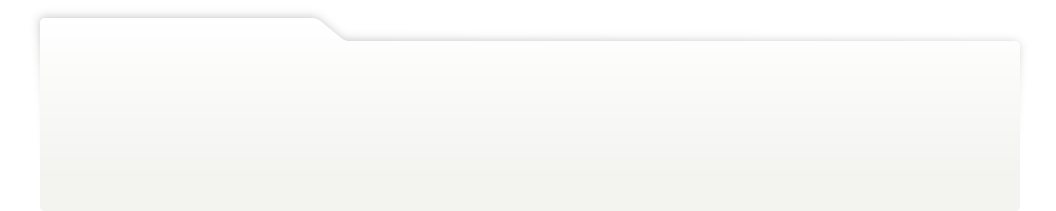
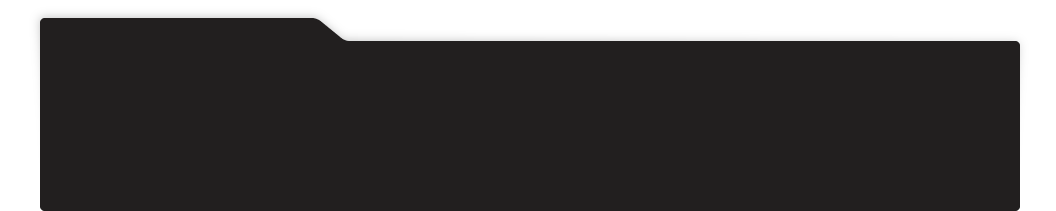
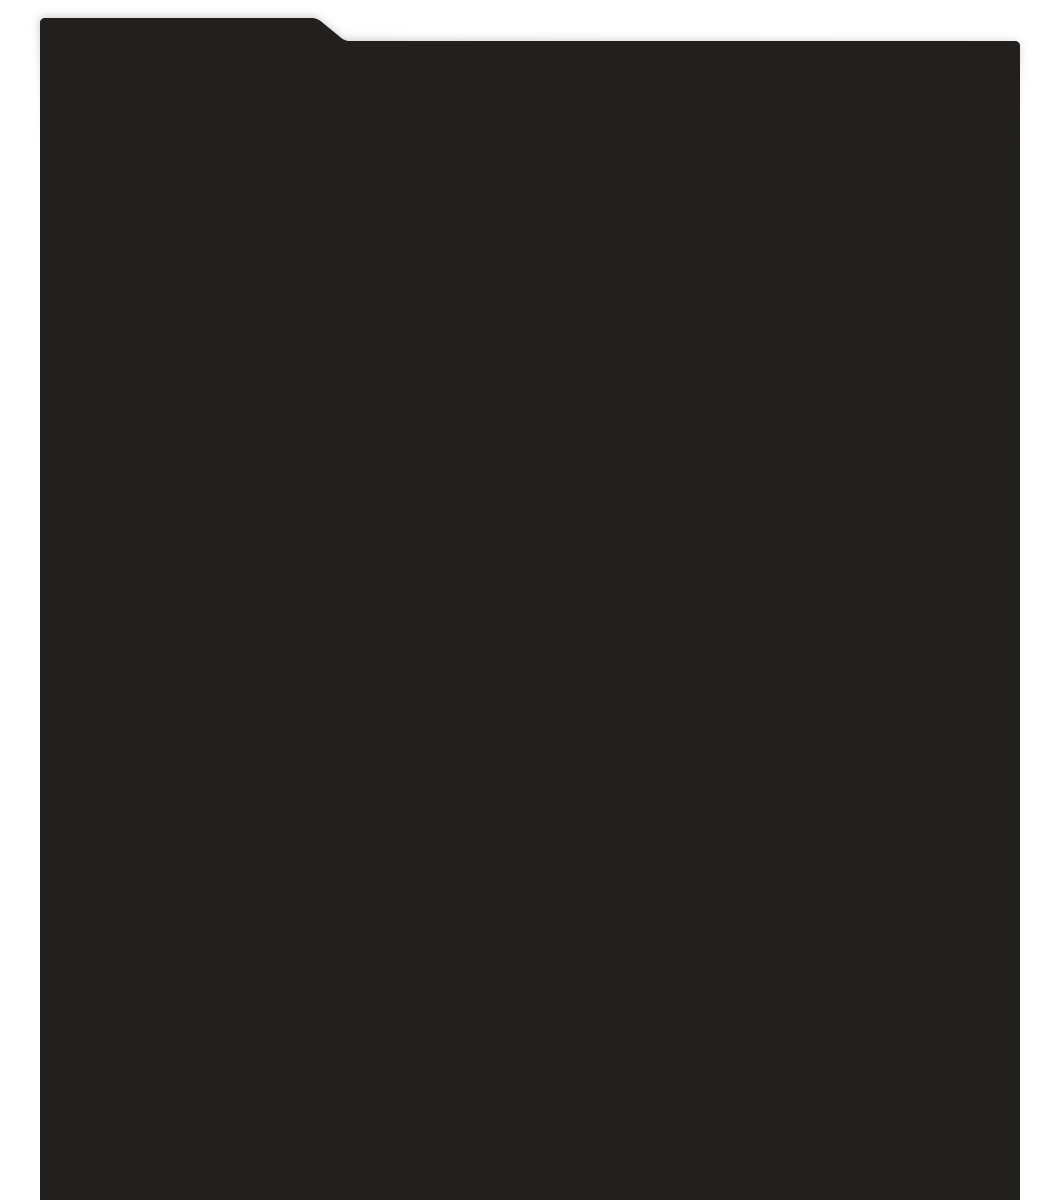
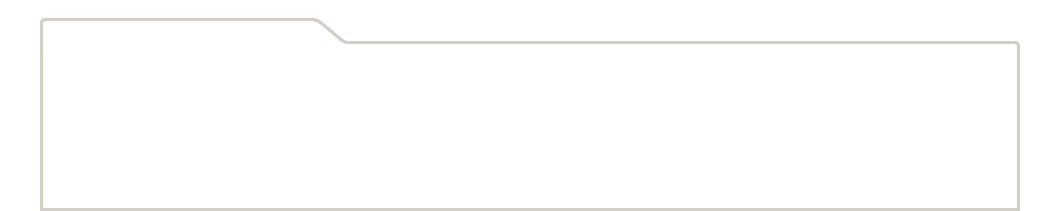
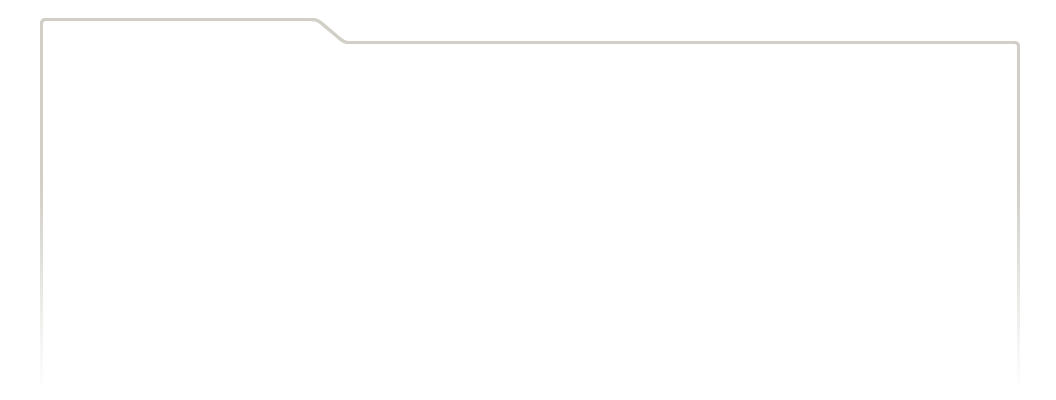
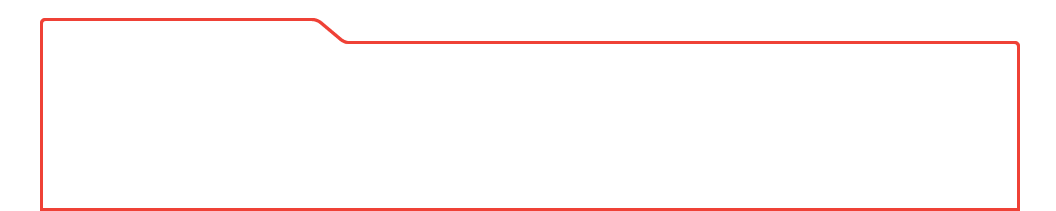
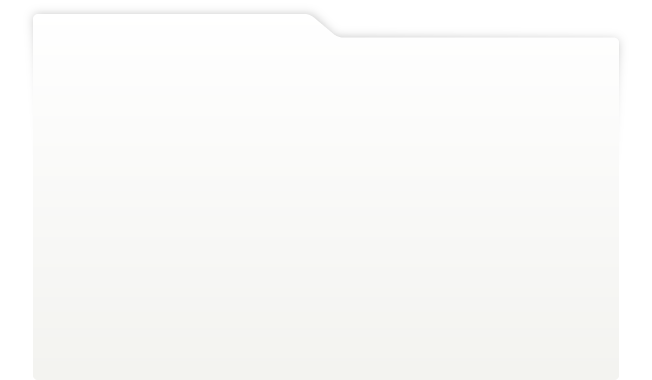
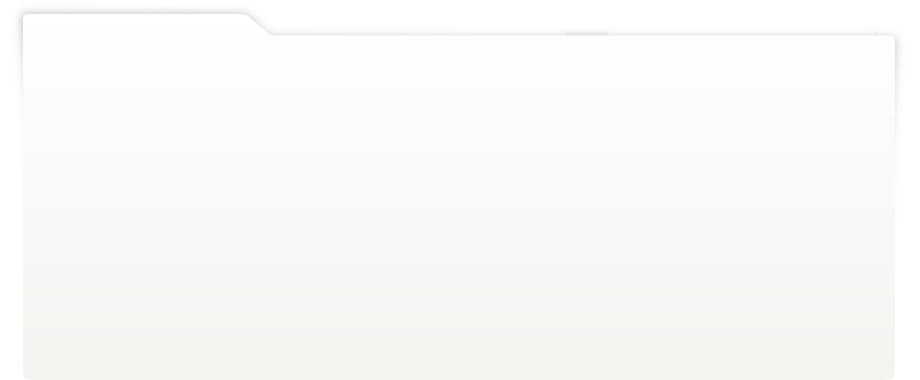
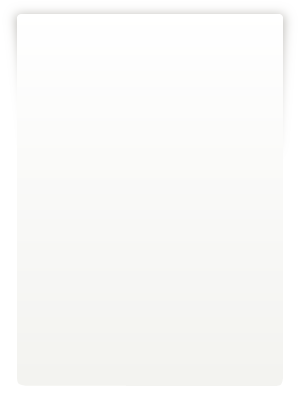
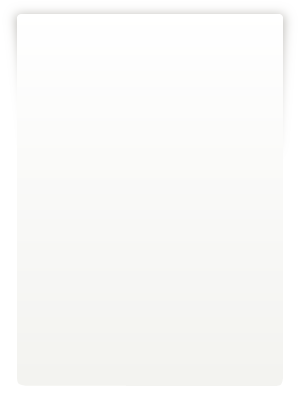
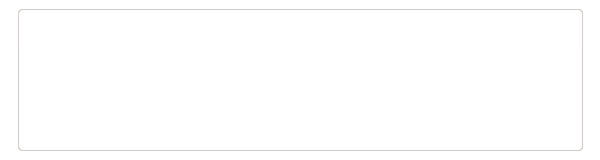
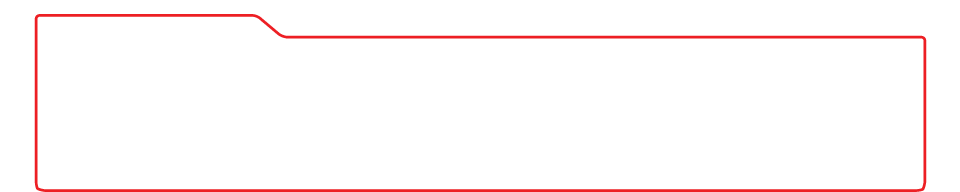
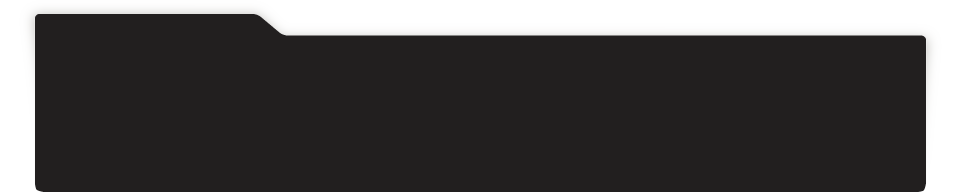
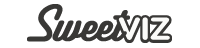
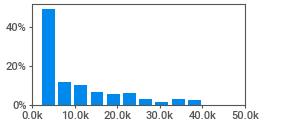
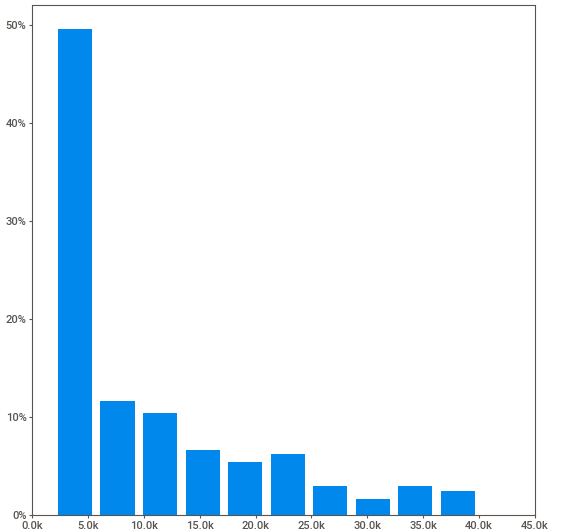
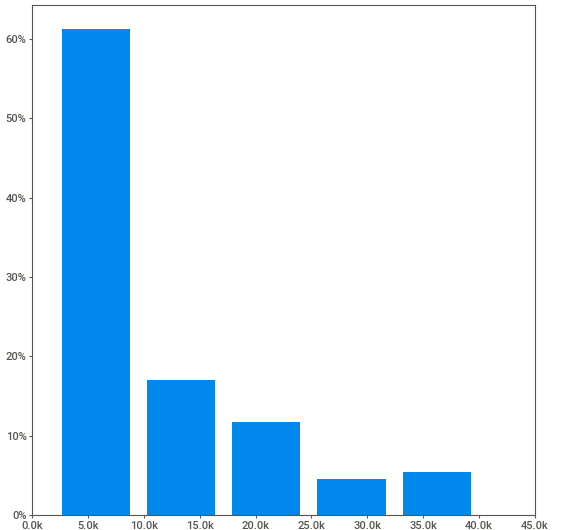
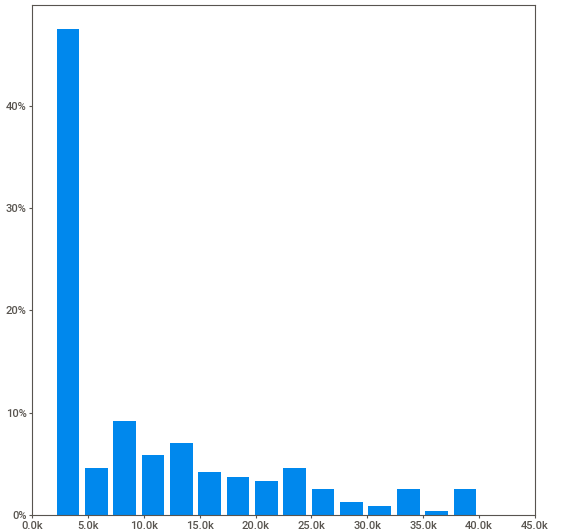
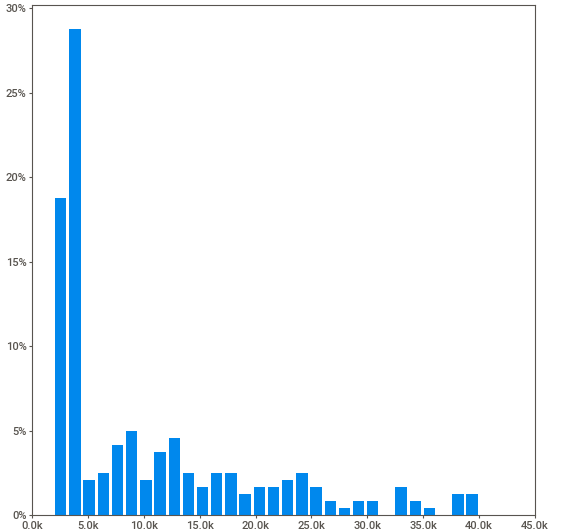
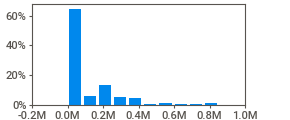
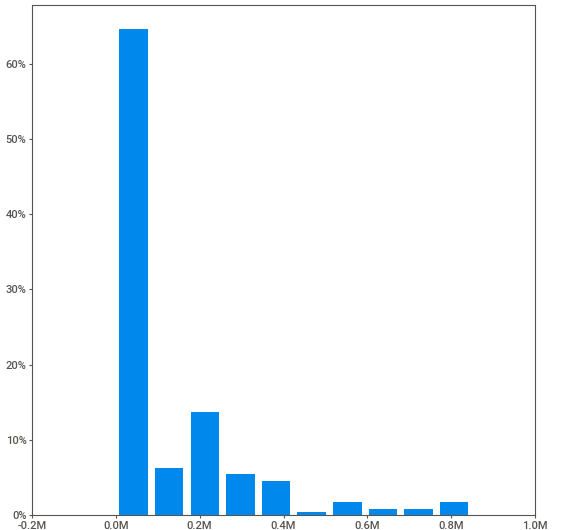
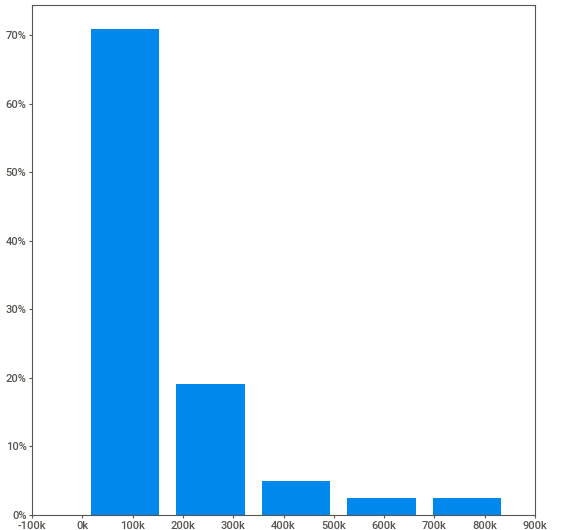
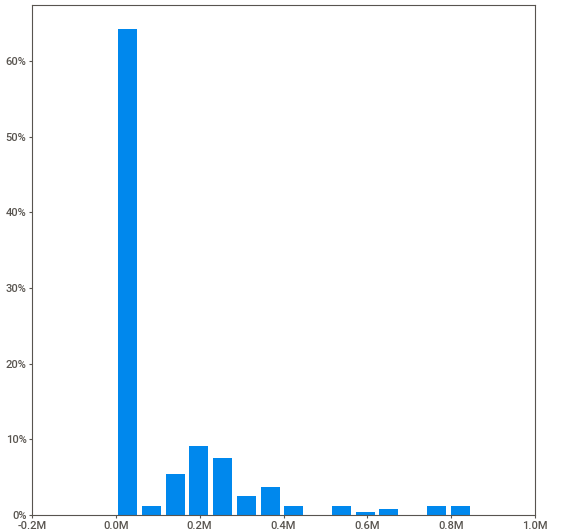
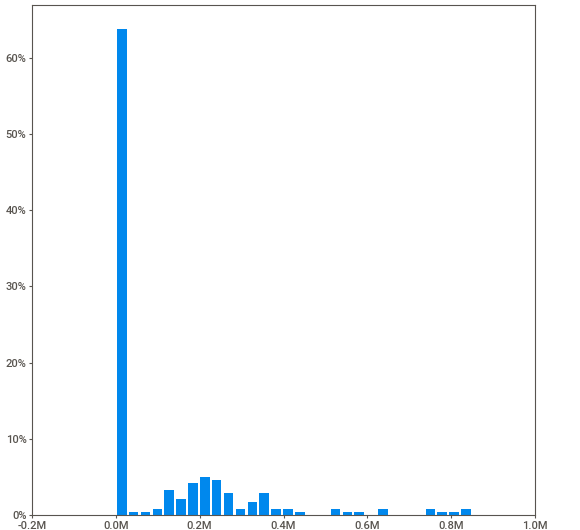
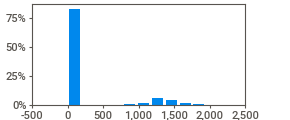
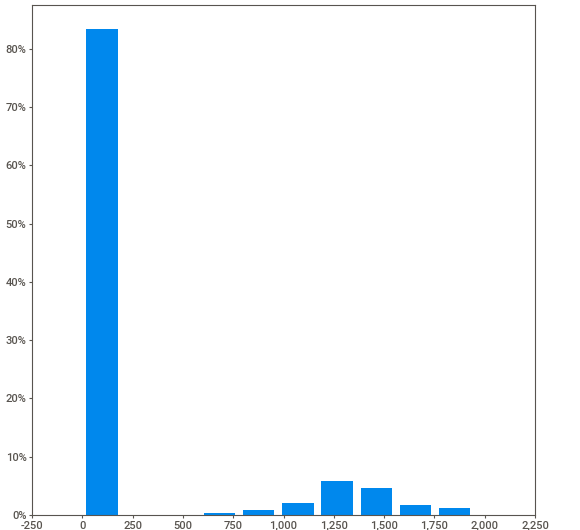
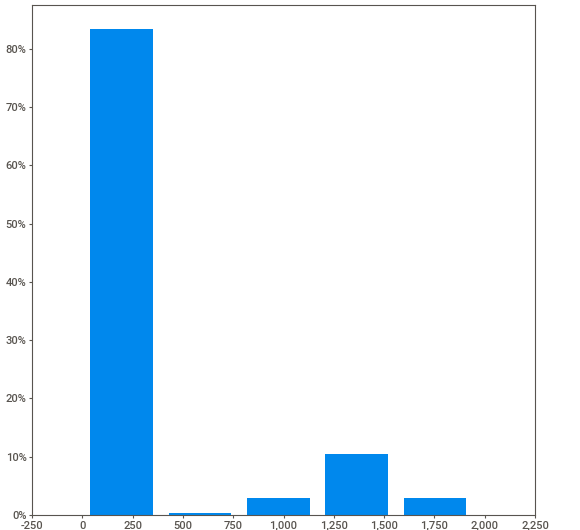
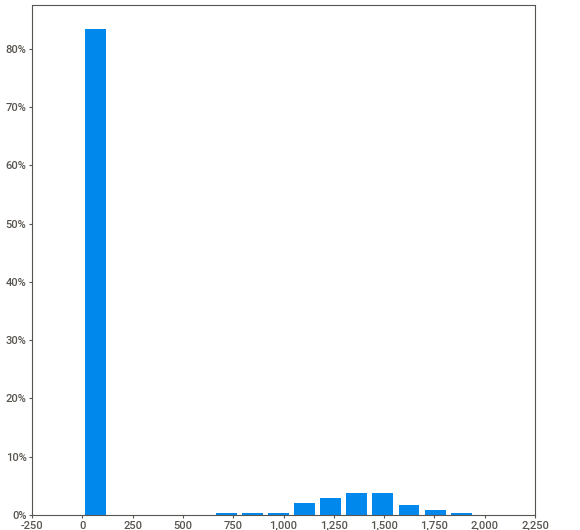
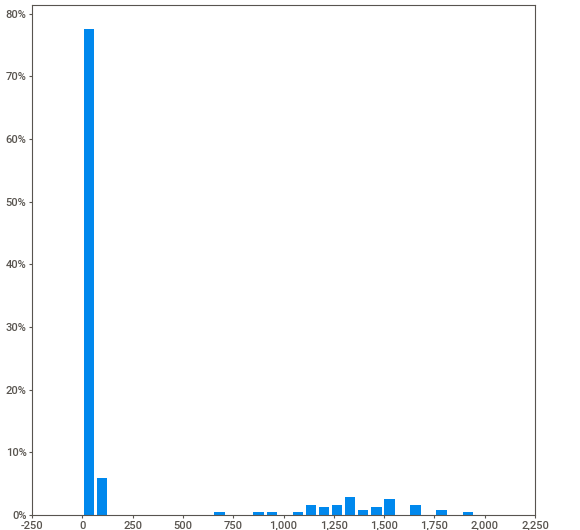
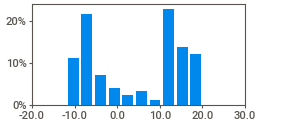
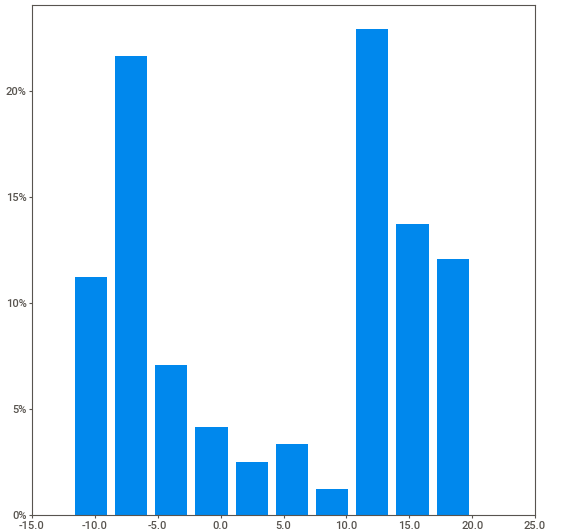
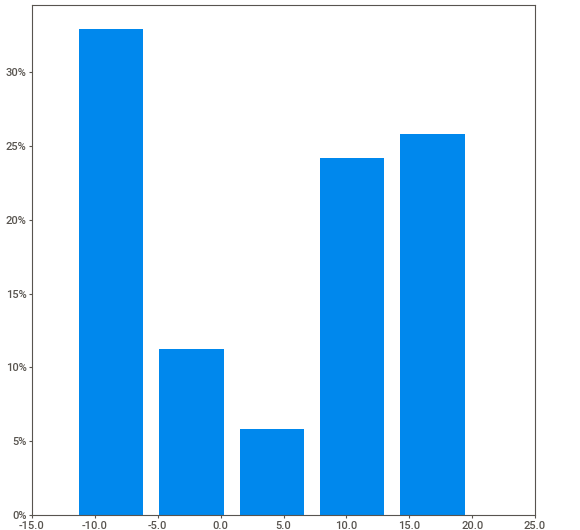
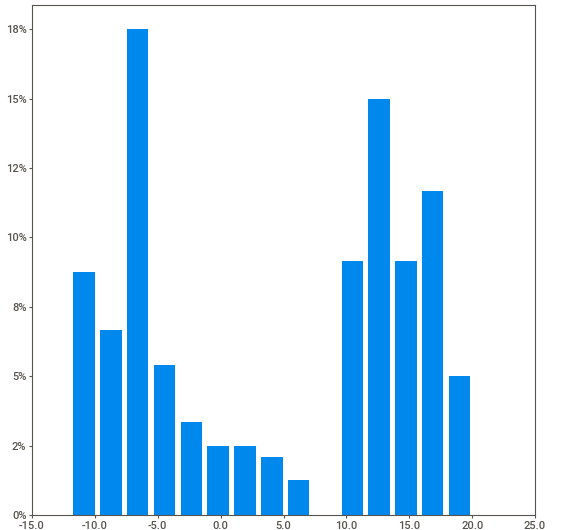
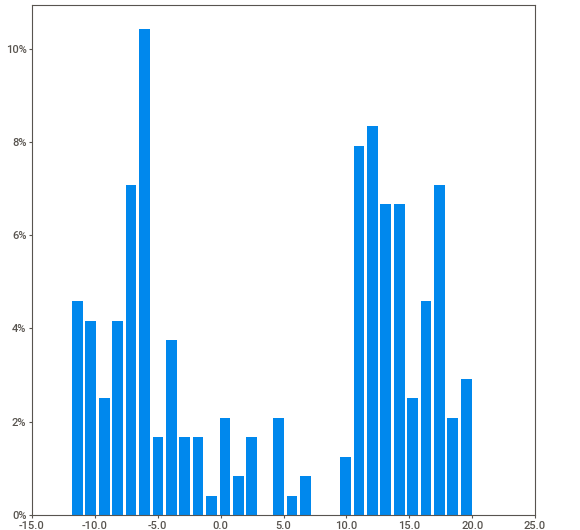
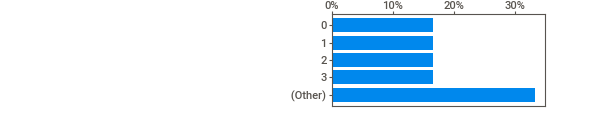
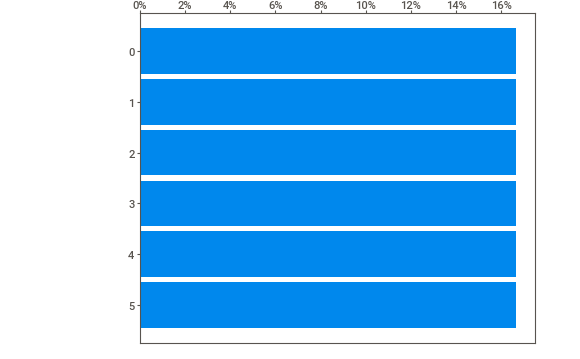
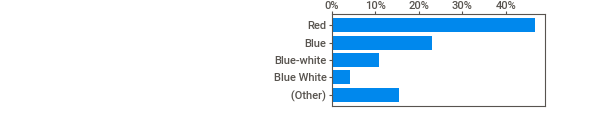
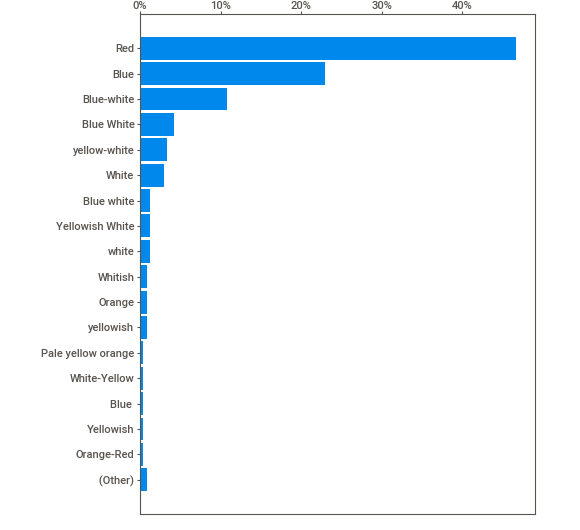
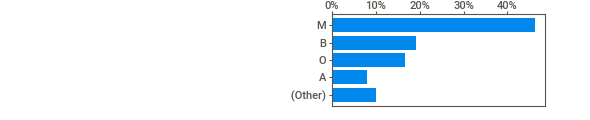
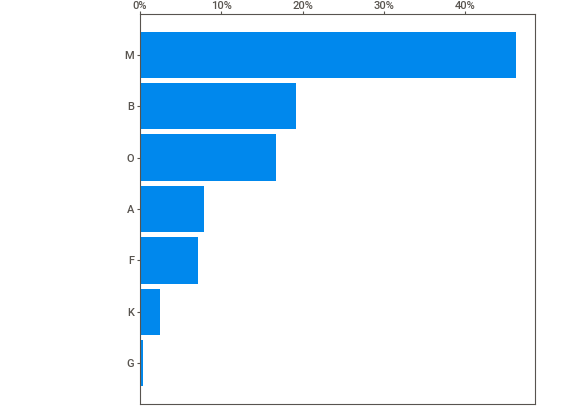
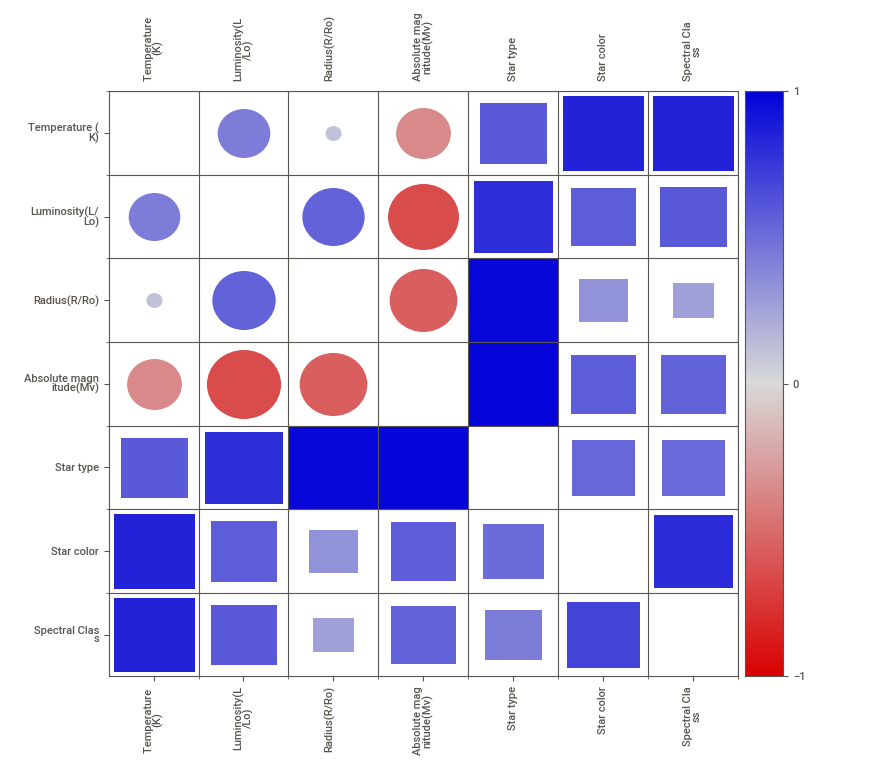
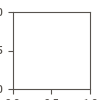

In [291]:
# Data Report and Visualization

import sweetviz as sv

ReportVisualizationPartTwo = sv.analyze(data)
ReportVisualizationPartTwo.show_notebook()

In [292]:
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [293]:
#convert to Dataframe
data = pd.DataFrame(data)
print(data)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

# Cleaning Data

In [294]:
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [295]:
data['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [296]:
data['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [297]:
#data['Star type']=data['Star type'].astype('object')

cleans Star color column

In [298]:
data['Star color'].value_counts()

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

In [299]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [300]:
# To address formatting issues, we perform preprocessing similar to NLP techniques.
# data['Star color'] = data['Star color'].str.lower().str.strip().str.replace('-', ' ')

In [301]:
data['Star color']= data['Star color'].replace( f'Blue ','Blue')
data['Star color']= data['Star color'].replace( f'white','White')
data['Star color']= data['Star color'].replace( f'yellowish','Yellowish')
data['Star color']= data['Star color'].replace( f'Blue white','Blue White')
data['Star color']= data['Star color'].replace( f'Blue white ','Blue White')
data['Star color']= data['Star color'].replace( f'Blue-White','Blue White')
data['Star color']= data['Star color'].replace( f'Blue-white','Blue White')
data['Star color']= data['Star color'].replace( f'yellow-white','Yellow White')
data['Star color']= data['Star color'].replace( f'White-Yellow','White Yellow')
data['Star color']= data['Star color'].replace( f'Orange-Red','Orange Red')

In [302]:
data['Star color'].value_counts()

Star color
Red                   112
Blue                   56
Blue White             41
White                  10
Yellow White            8
Yellowish White         3
Yellowish               3
Whitish                 2
Orange                  2
Pale yellow orange      1
White Yellow            1
Orange Red              1
Name: count, dtype: int64

cleans Spectral Class column

In [303]:
data['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

Remove the duplicated values

In [304]:
data=data.drop_duplicates()

In [305]:
data.shape

(240, 7)

# Missing Values and Imputation

missing values heatmap in each columns

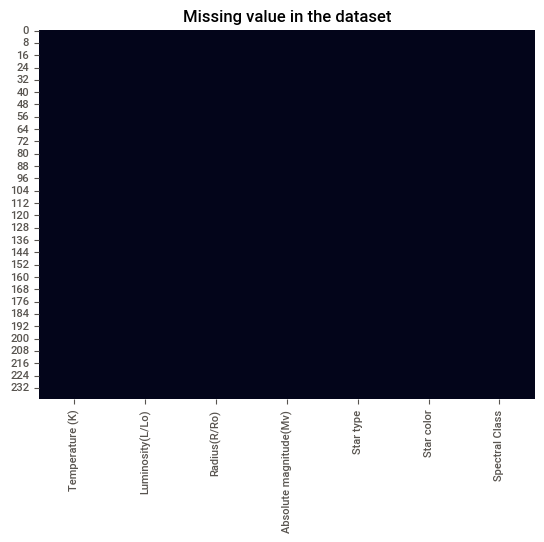

In [306]:
# Plot the heatmap on dataset to check the missing values
plt.figure()#figsize=(4, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

percent of missing values in each columns

In [307]:
round(((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False),2)

Temperature (K)           0.0
Luminosity(L/Lo)          0.0
Radius(R/Ro)              0.0
Absolute magnitude(Mv)    0.0
Star type                 0.0
Star color                0.0
Spectral Class            0.0
dtype: float64

In [308]:
print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {data.shape}")
print("\n")


------------------------------------------------------------------------------------------------------------------------------------------------------
COMPLETE DATA WITH NO MISSING VALUES
------------------------------------------------------------------------------------------------------------------------------------------------------
The shape of the complete dataframe is: (240, 7)




# Descriptive statistics


Column Statistics (of categorical data)

In [309]:
def plot_variable_comparison(data, target_variable, plot_type):
    """
    Plot a matrix of graphs comparing a target variable to all other variables in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        target_variable (str): Name of the target variable to compare with all other variables.
        plot_type (str): Type of plot to generate for each comparison ('scatter', 'box', 'bar', 'violin').
    """
    # Get the list of all columns in the DataFrame
    columns = data.columns.tolist()

    # Remove the target variable from the list of columns if necessary
    if target_variable in columns:
        columns.remove(target_variable)

    # Determine the number of variables to compare
    num_variables = len(columns)

    # Create a figure with subplots based on the number of variables
    fig, axes = plt.subplots(num_variables, 1, figsize=(8, 4*num_variables))

    # Initialize a counter for the valid plots
    valid_plot_count = 0

    # Iterate over each column (variable) and plot the comparison with the target variable
    for i, col in enumerate(columns):

        # Determine if the plot should be generated based on the plot_type
        if (plot_type == 'scatter') or (plot_type == 'box' and data[col].dtype.kind in 'biufc') or (plot_type == 'bar' and data[col].dtype.kind == 'O') or (plot_type == 'violin' and data[col].dtype.kind in 'biufc'):

            # Plot the comparison based on the plot_type
            ax = axes[valid_plot_count]  # Use the valid plot count to index into axes
            if plot_type == 'scatter':
                sns.scatterplot(x=target_variable, y=col, data=data, ax=ax)
                ax.set_title(f'{col} vs {target_variable}')
                ax.set_xlabel(target_variable)
                ax.set_ylabel(col)

            elif plot_type == 'box':
                sns.boxplot(x=target_variable, y=col, data=data, ax=ax)
                ax.set_title(f'{col} vs {target_variable} (Boxplot)')
                ax.set_xlabel(target_variable)
                ax.set_ylabel(col)

            elif plot_type == 'violin':
                sns.violinplot(x=target_variable, y=col, data=data, ax=ax)
                ax.set_title(f'{col} vs {target_variable} (Violinplot)')
                ax.set_xlabel(target_variable)
                ax.set_ylabel(col)

            elif plot_type == 'bar':
                sns.countplot(x=col, hue=target_variable, data=data, ax=ax)
                ax.set_title(f'{col} by {target_variable}')
                ax.set_xlabel(col)
                ax.tick_params(axis='x', rotation=90)
                ax.set_ylabel('Count')
                ax.legend(title=target_variable)
                plt.xticks(rotation='vertical')

            valid_plot_count += 1

    for j in range(valid_plot_count, num_variables):
        fig.delaxes(axes[j])

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


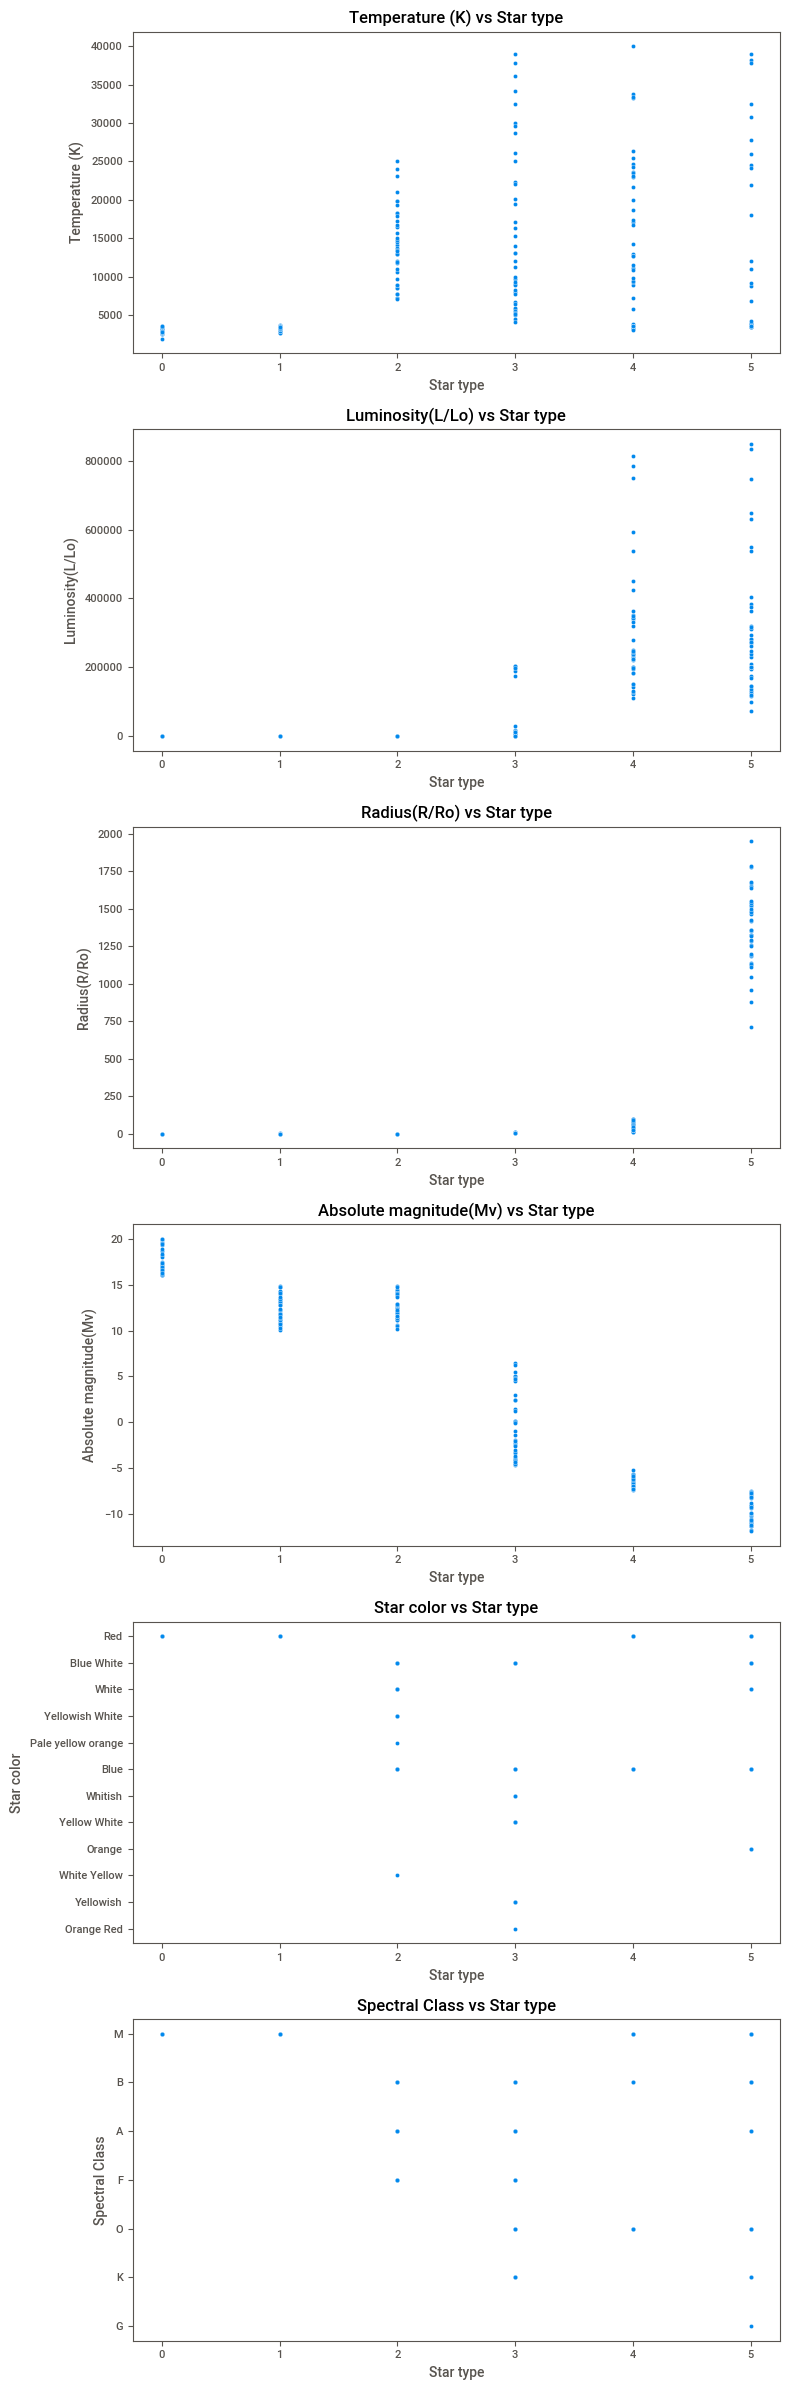

In [310]:
target_variable = 'Star type'
plot_variable_comparison(data, target_variable, 'scatter')

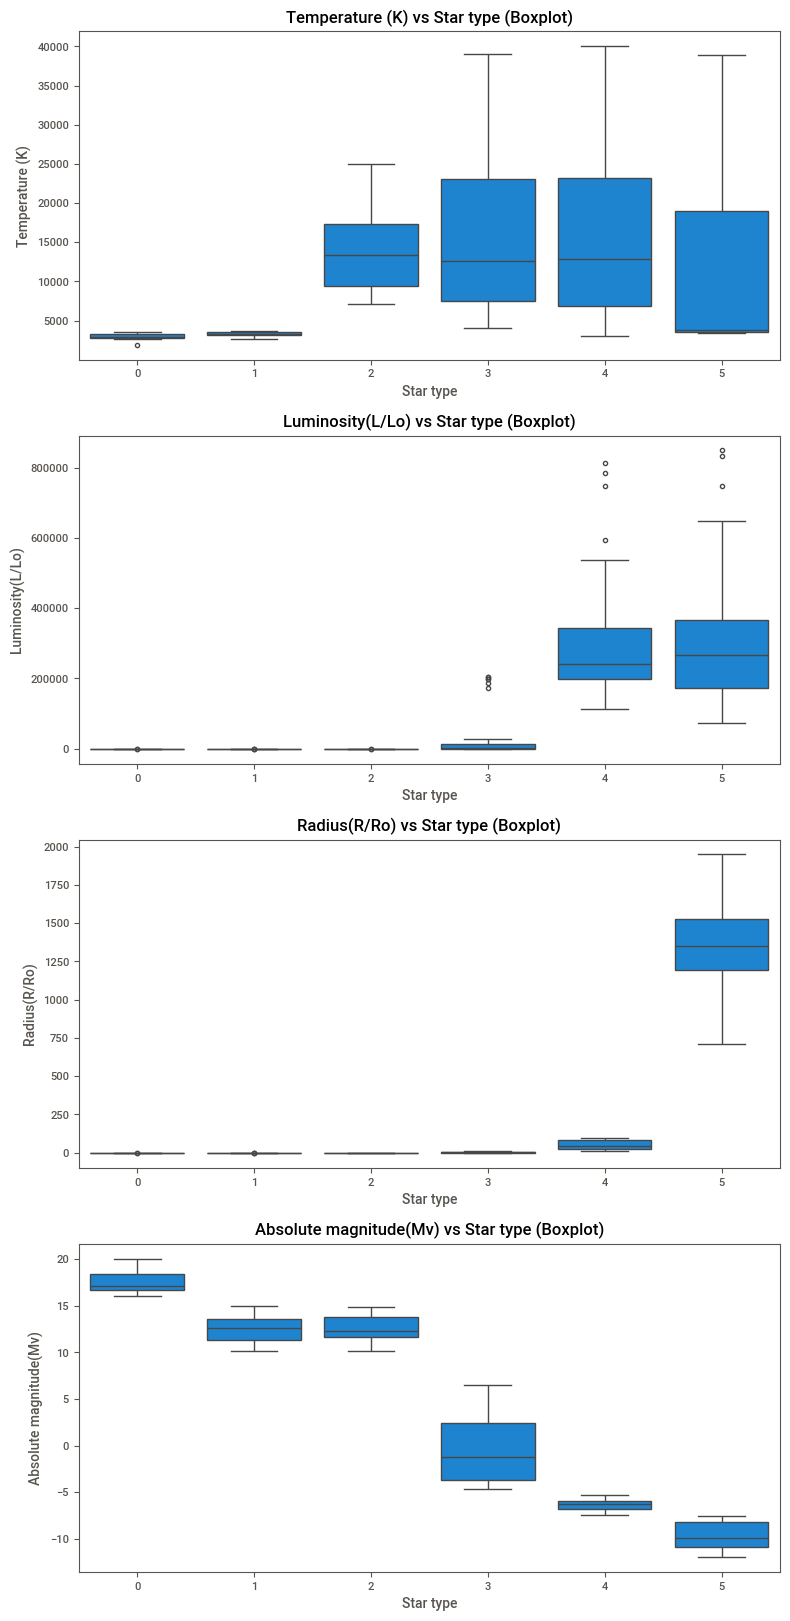

In [311]:
plot_variable_comparison(data, target_variable, 'box')

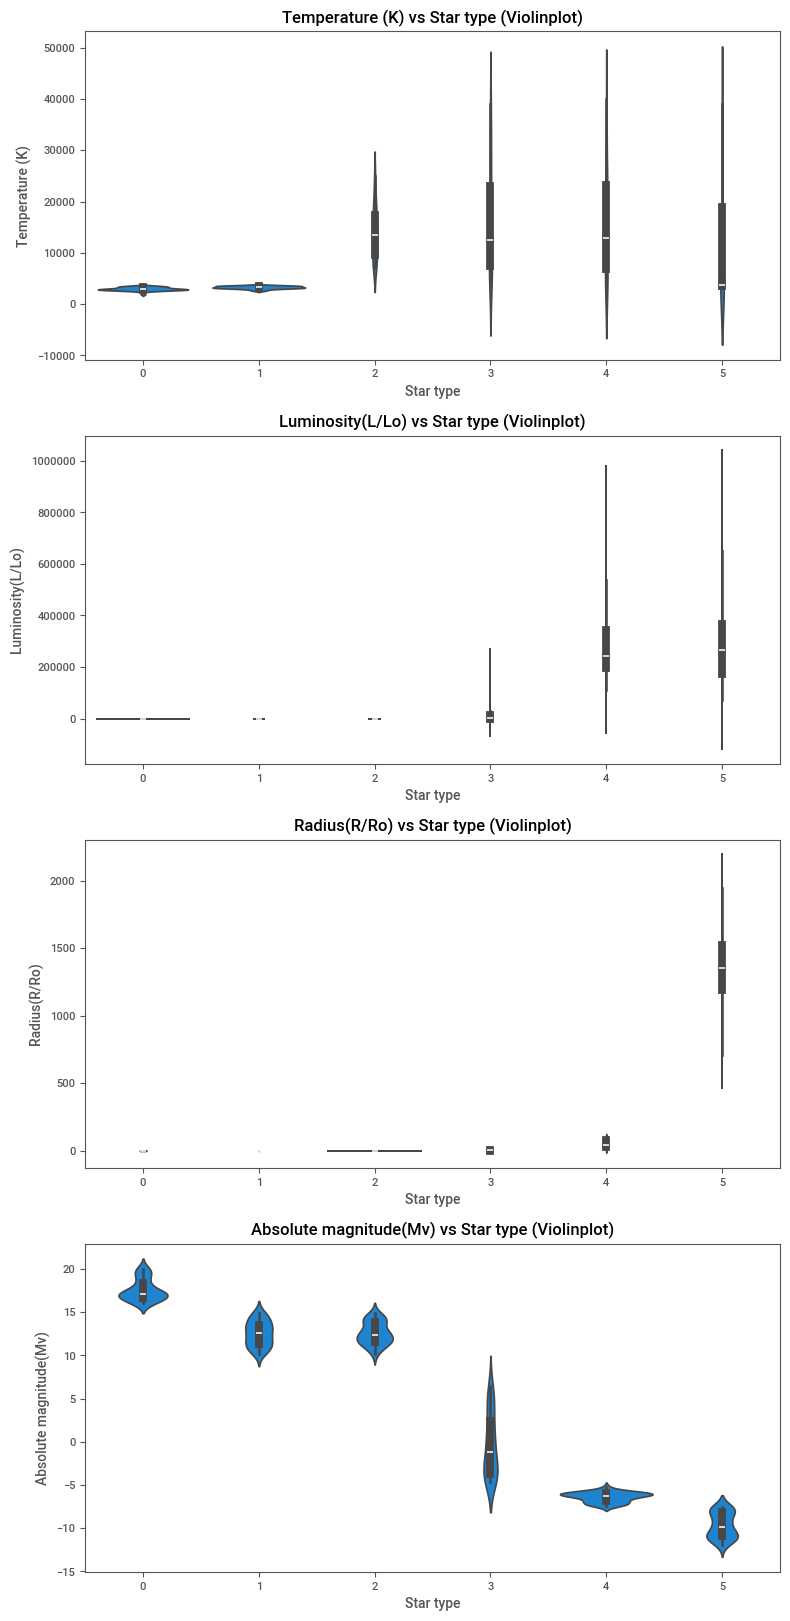

In [312]:
plot_variable_comparison(data, target_variable, 'violin')

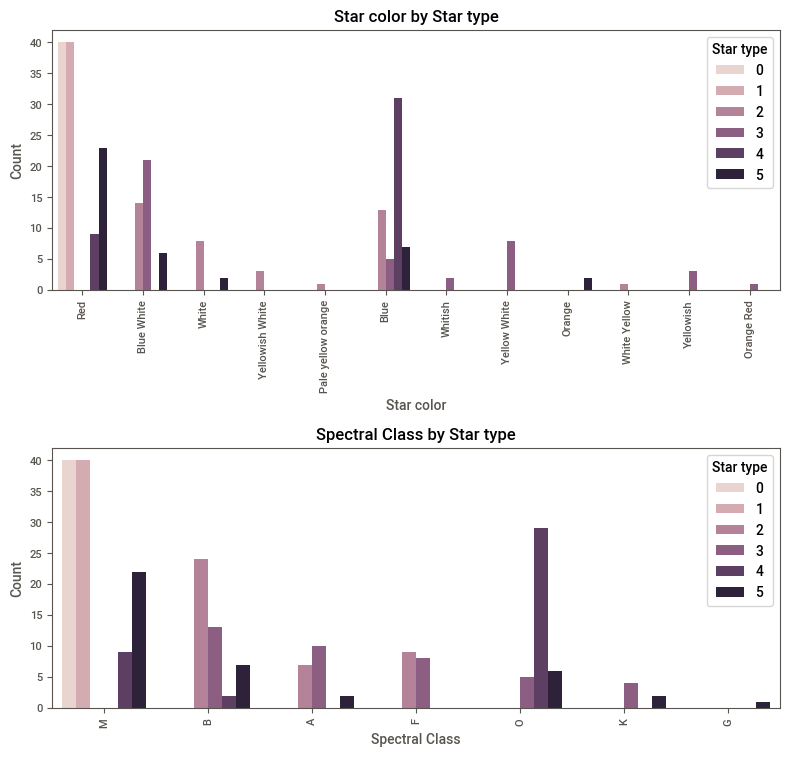

In [313]:
plot_variable_comparison(data, target_variable, 'bar')

Balance ratio of target to features

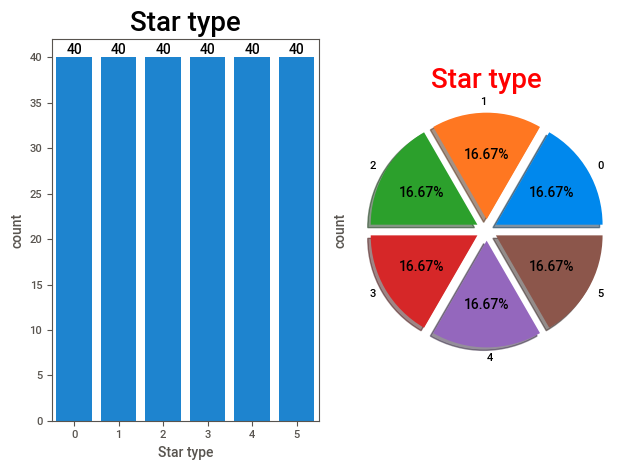

In [314]:
# First subplot: count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Star type', data=data)
ax1.bar_label(ax1.containers[0])
plt.title("Star type", fontsize=20)

# Second subplot: pie chart
ax2 = plt.subplot(1, 2, 2)
spectral_class_counts = data['Star type'].value_counts()
explode = [0.1] * len(spectral_class_counts)  # Adjust the explode list to match the number of unique spectral classes
ax2 = spectral_class_counts.plot.pie(explode=explode, autopct='%1.2f%%', shadow=True)
ax2.set_title("Star type", fontsize=20, color='Red')

# Show the plot
plt.tight_layout()
plt.show()

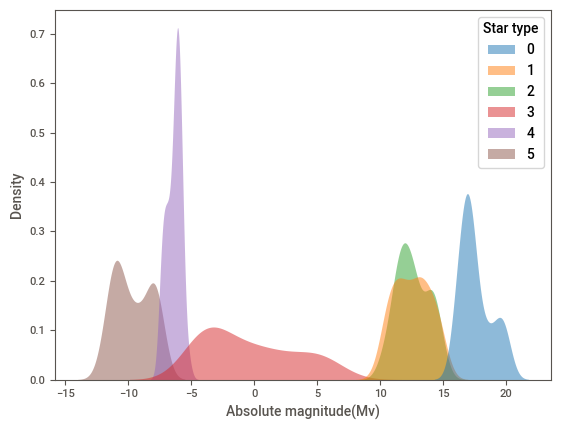

In [315]:
sns.kdeplot( data, x="Absolute magnitude(Mv)", hue="Star type", fill=True, common_norm=False, palette="tab10", alpha=.5, linewidth=0);

# Encoding Categorical Features

Categorical Features : Star color , Spectral Class

In [316]:
df = copy.copy(data)

In [317]:
# encode all the categorical features
label_encoder = LabelEncoder()

#Encode Star color Feature
label_encoder.fit(df["Star color"])
df["Star color_en"] = label_encoder.fit_transform(df["Star color"])
df.drop("Star color",axis=1,inplace=True)

#Encode Spectral Class Feature
label_encoder.fit(df["Spectral Class"])
df["Spectral Class_en"] = label_encoder.fit_transform(df["Spectral Class"])
df.drop("Spectral Class",axis=1,inplace=True)

# corr_matrix

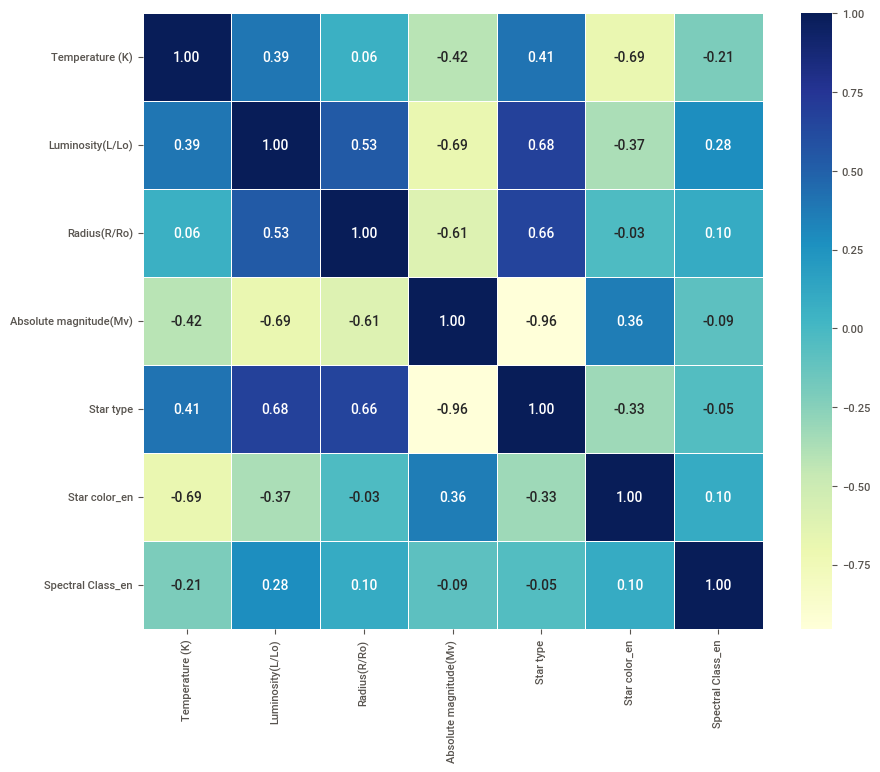

In [318]:
#Make our corr_matrix prettier
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (10 , 8))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

# Train_Test_Split

In [319]:
#Splitting the data into train - test sets
#feature
x = df.drop('Star type' , axis = 1)
#target
y = df["Star type"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25, random_state=5)
display(f"Train set size:    {x_train.shape, y_train.shape}", f"Test set size:     {x_test.shape, y_test.shape}")

'Train set size:    ((180, 6), (180,))'

'Test set size:     ((60, 6), (60,))'

In [320]:
sc = StandardScaler()
x_train_ss=sc.fit_transform(x_train)
x_test_ss=sc.transform(x_test)

#    🏗 Modelling

In [321]:
results = {}

# Random Forest model

In [322]:
method = 'Random Forest'

# Initialize the Random Forest Classifier model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=5)

# Fit the model to the training data
rfc_model.fit(x_train_ss, y_train)

# Predict on the testing data
y_pred_rfc = rfc_model.predict(x_test_ss)

print('y_pred_rfc: ',y_pred_rfc)

y_pred_rfc:  [0 4 5 0 4 4 1 0 5 5 5 4 5 3 0 2 4 4 0 2 5 5 3 2 0 5 2 4 4 1 0 2 4 5 3 2 3
 4 1 3 2 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [323]:
# Compute confusion matrix for model with Random Forest Classifier
conf_mat_rfc= metrics.confusion_matrix(y_test, y_pred_rfc)
print('Random Forest Classifier [n_estimators=100]')
print('confusion matrix: ''\n', conf_mat_rfc)

# Calculate accuracy score on test set
accuracy_score_rfc= accuracy_score(y_test, y_pred_rfc)
print('accuracy score: ', accuracy_score_rfc)
print('accuracy in percentage: ',int(accuracy_score_rfc*100),'%')
print(classification_report(y_test, y_pred_rfc))

results[method] = accuracy_score_rfc

Random Forest Classifier [n_estimators=100]
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 12]]
accuracy score:  1.0
accuracy in percentage:  100 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



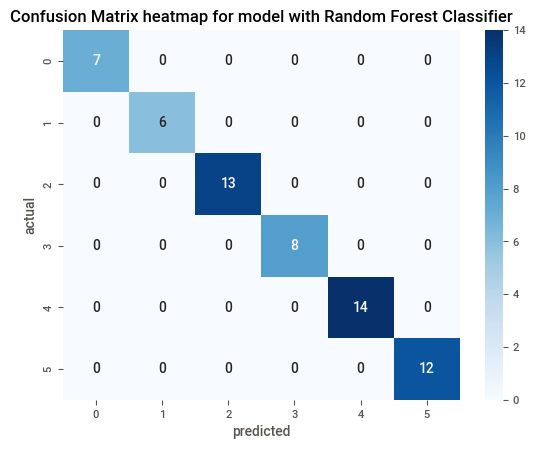

In [324]:
# Plot confusion matrix for model with Random Forest Classifier
conf_mat_rfc= pd.crosstab(y_test, y_pred_rfc, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_rfc, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with Random Forest Classifier')
plt.show()

# Feature Importances

In [325]:
# Get feature importances
rfc_fit = rfc_model.fit(x_train, y_train)
importances = rfc_fit.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df1 = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the DataFrame by importance value
sorted_feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(sorted_feature_importance_df1)

                  Feature  Importance
3  Absolute magnitude(Mv)    0.313319
2            Radius(R/Ro)    0.302092
1        Luminosity(L/Lo)    0.163848
0         Temperature (K)    0.111368
5       Spectral Class_en    0.079658
4           Star color_en    0.029714


FEATURE IMPORTANCE BAR PLOT

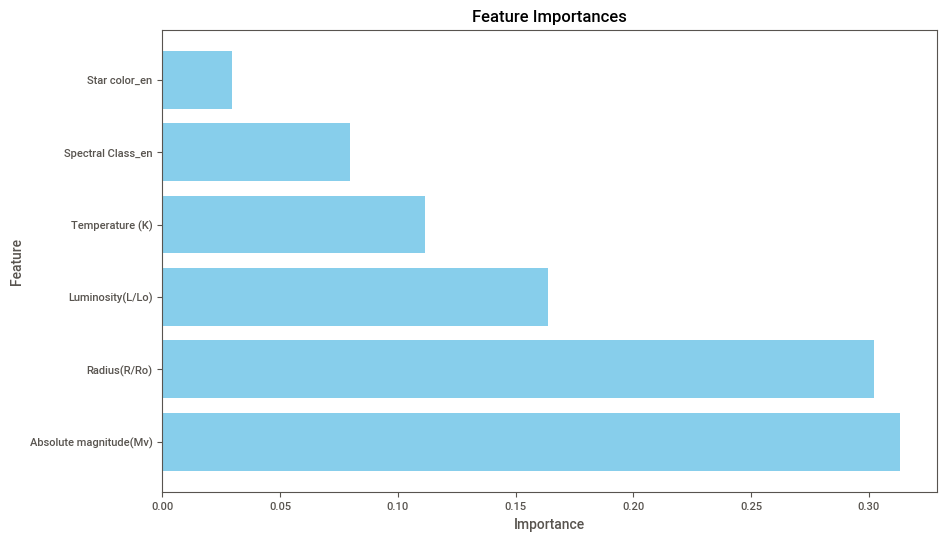

In [326]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance_df1['Feature'], sorted_feature_importance_df1['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Decision Tree Classifier

In [327]:
method = 'Decision Tree'

# Fitting the Model (Decision Tree Classifier)
tree_model = DecisionTreeClassifier(criterion='entropy' ,random_state=5)

# Train the model
tree_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(x_test_ss)
print('y_pred_tree: ',y_pred_tree)

y_pred_tree:  [0 4 5 0 4 4 1 0 5 5 5 4 5 3 0 2 4 4 0 2 5 5 3 2 0 5 2 4 4 1 0 2 4 5 3 2 3
 4 1 3 2 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [328]:
# Compute confusion matrix for model with Decision Tree
conf_mat_tree= metrics.confusion_matrix(y_test, y_pred_tree)
print('DecisionTreeClassifier [criterion - entropy]')
print('confusion matrix: ' '\n', conf_mat_tree)

# Calculate accuracy score on test set
accuracy_score_tree= accuracy_score(y_test, y_pred_tree)
print('accuracy score: ', accuracy_score_tree)
print('accuracy in percentage: ',int(accuracy_score_tree*100),'%')
print(classification_report(y_test, y_pred_tree))

results[method] = accuracy_score_tree

DecisionTreeClassifier [criterion - entropy]
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 12]]
accuracy score:  1.0
accuracy in percentage:  100 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



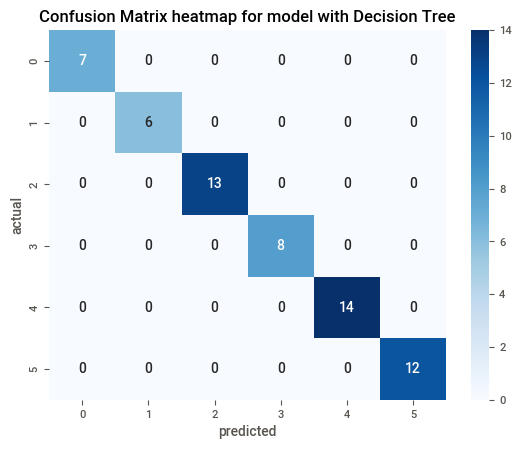

In [329]:
# Plot confusion matrix for model with Decision Tree
conf_mat_tree= pd.crosstab(y_test, y_pred_tree, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_tree, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with Decision Tree')
plt.show()

# Logistic Regression

Logistic Regression model

In [330]:
method = 'Logistic Regression'

# Fitting the Model (Logistic Regression)
lr_model = LogisticRegression(solver='lbfgs', max_iter=100000 ,random_state=5)

# Train the model
lr_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(x_test_ss)
print('y_pred_lr: ',y_pred_lr)

y_pred_lr:  [0 4 5 0 4 4 1 0 5 5 5 4 5 1 0 2 4 4 0 2 5 5 3 2 0 5 2 4 4 1 0 2 4 5 3 2 3
 4 1 3 3 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [331]:
# Compute confusion matrix for model with Logistic Regression
conf_mat_lr= metrics.confusion_matrix(y_test, y_pred_lr)
print('Logistic Regression [lbfgs , max_iter=100000]')
print('confusion matrix: ' '\n', conf_mat_lr)

# Calculate accuracy score on test set
accuracy_score_lr= accuracy_score(y_test, y_pred_lr)
print('accuracy score: ', accuracy_score_lr)
print('accuracy in percentage: ',int(accuracy_score_lr*100),'%')
print(classification_report(y_test, y_pred_lr))

results[method] = accuracy_score_lr

Logistic Regression [lbfgs , max_iter=100000]
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 12  1  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 12]]
accuracy score:  0.9666666666666667
accuracy in percentage:  96 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



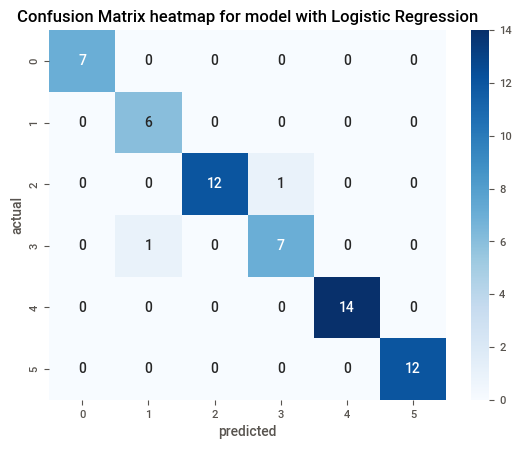

In [332]:
# Plot confusion matrix for model with Logistic Regression
conf_mat_lr= pd.crosstab(y_test, y_pred_lr, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_lr, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with Logistic Regression')
plt.show()

# Support Vector Machine

In [333]:
method = 'SVM'

# Fitting the Model (support vector machine)
svm_model= SVC(kernel='linear',random_state=0 ,probability=True)

# Train the model
svm_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(x_test_ss)
print('y_pred_svm: ', y_pred_svm)

y_pred_svm:  [0 4 5 0 4 4 1 0 5 5 5 4 5 1 0 2 4 4 0 2 5 5 3 2 0 5 2 4 4 1 0 2 4 5 3 2 3
 4 1 3 2 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [334]:
# Compute confusion matrix for model with support vector machine
conf_mat_svm= metrics.confusion_matrix(y_test, y_pred_svm)
print('support vector machine [kernerl - rbf]')
print('confusion matrix: ' '\n', conf_mat_svm)

# Calculate accuracy score on test set
accuracy_score_svm= accuracy_score(y_test, y_pred_svm)
print('accuracy score: ', accuracy_score_svm)
print('accuracy in percentage: ',int(accuracy_score_svm*100),'%')
print(classification_report(y_test, y_pred_svm))

results[method] = accuracy_score_svm

support vector machine [kernerl - rbf]
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 12]]
accuracy score:  0.9833333333333333
accuracy in percentage:  98 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.99      0.98      0.98        60



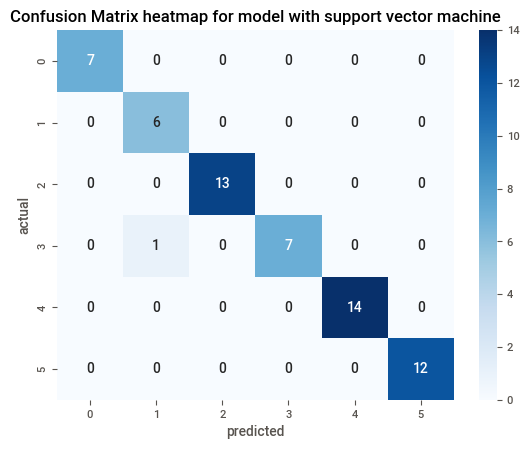

In [335]:
# Plot confusion matrix for model with support vector machine
conf_mat_svm= pd.crosstab(y_test, y_pred_svm, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_svm, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with support vector machine')
plt.show()

# K-Nearest Neighbors (KNN)

how to determine k in knn model????

In [336]:
method = 'KNN'

# Fitting the Model (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train the model
knn_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(x_test_ss)
print('y_pred_knn: ', y_pred_knn)

y_pred_knn:  [0 4 5 0 4 4 1 0 5 5 5 4 5 1 0 2 4 4 0 2 5 5 3 2 0 3 2 4 4 1 0 2 4 5 3 3 3
 4 1 3 3 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [337]:
# Compute confusion matrix for model with K-Nearest Neighbors
conf_mat_knn= metrics.confusion_matrix(y_test, y_pred_knn)
print('K-Nearest Neighbors [n_neighbors=5, minkowski]')
print('confusion matrix: ' '\n', conf_mat_knn)

# Calculate accuracy score on test set
accuracy_score_knn= accuracy_score(y_test, y_pred_knn)
print('accuracy score: ', accuracy_score_knn)
print('accuracy in percentage: ',int(accuracy_score_knn*100),'%')
print(classification_report(y_test, y_pred_knn))

results[method] = accuracy_score_knn

K-Nearest Neighbors [n_neighbors=5, minkowski]
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 11  2  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  1  0 11]]
accuracy score:  0.9333333333333333
accuracy in percentage:  93 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      0.85      0.92        13
           3       0.70      0.88      0.78         8
           4       1.00      1.00      1.00        14
           5       1.00      0.92      0.96        12

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.95      0.93      0.94        60



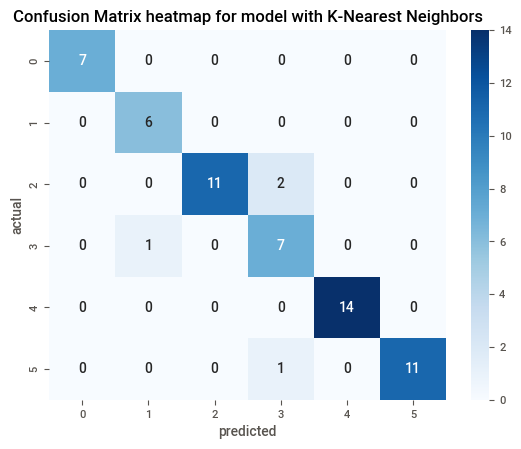

In [338]:
# Plot confusion matrix for model with K-Nearest Neighbors
conf_mat_knn= pd.crosstab(y_test, y_pred_knn, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_knn, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with K-Nearest Neighbors')
plt.show()

# Gradient Boosting Machines (GBM)

In [339]:
method = 'Gradient Boosting'

# Fit Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier()

# Fit Lasso regression model
gbm_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_gbm = gbm_model.predict(x_test_ss)

print('y_pred_GBM: ',y_pred_gbm)

y_pred_GBM:  [0 4 5 0 1 4 1 0 5 5 5 4 5 3 0 2 4 4 0 2 5 5 3 2 0 5 2 4 1 1 0 2 4 5 3 2 3
 1 1 3 2 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [340]:
# Compute confusion matrix for model with Gradient Boosting Machines (GBM)
conf_mat_gbm= metrics.confusion_matrix(y_test, y_pred_gbm)
print('Gradient Boosting Machines (GBM)')
print('confusion matrix: ' '\n', conf_mat_gbm)

# Calculate accuracy score on test set
accuracy_score_gbm= accuracy_score(y_test, y_pred_gbm)
print('accuracy score: ', accuracy_score_gbm)
print('accuracy in percentage: ',int(accuracy_score_gbm*100),'%')
print(classification_report(y_test, y_pred_gbm))

results[method] = accuracy_score_gbm

Gradient Boosting Machines (GBM)
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  3  0  0 11  0]
 [ 0  0  0  0  0 12]]
accuracy score:  0.95
accuracy in percentage:  95 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      0.79      0.88        14
           5       1.00      1.00      1.00        12

    accuracy                           0.95        60
   macro avg       0.94      0.96      0.95        60
weighted avg       0.97      0.95      0.95        60



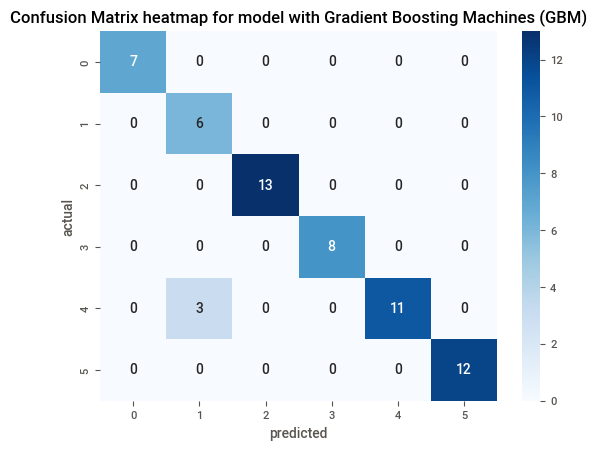

In [341]:
# Plot confusion matrix for model with Gradient Boosting Machines (GBM)
conf_mat_gbm= pd.crosstab(y_test, y_pred_gbm, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_gbm, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with Gradient Boosting Machines (GBM)')
plt.show()

# Gaussian Naive Bayes

In [342]:
method = 'Naive Bayes'

# Fit Gaussian Naive Bayes
gnb_model = GaussianNB()

# Fit Lasso regression model
gnb_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_gnb = gnb_model.predict(x_test_ss)

print('y_pred_GNB: ',y_pred_gnb)

y_pred_GNB:  [0 4 5 0 4 4 1 0 5 5 5 4 5 3 0 2 4 4 0 2 5 5 3 2 0 5 2 4 4 1 0 2 4 5 3 2 3
 4 1 3 2 2 2 1 2 2 5 4 4 4 5 1 4 5 3 2 3 2 1 3]


In [343]:
# Compute confusion matrix for model with Gaussian Naive Bayes
conf_mat_gnb= metrics.confusion_matrix(y_test, y_pred_gnb)
print('Gaussian Naive Bayes')
print('confusion matrix: ' '\n', conf_mat_gnb)

# Calculate accuracy score on test set
accuracy_score_gnb= accuracy_score(y_test, y_pred_gnb)
print('accuracy score: ', accuracy_score_gnb)
print('accuracy in percentage: ',int(accuracy_score_gnb*100),'%')
print(classification_report(y_test, y_pred_gnb))

results[method] = accuracy_score_gnb

Gaussian Naive Bayes
confusion matrix: 
 [[ 7  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 12]]
accuracy score:  1.0
accuracy in percentage:  100 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



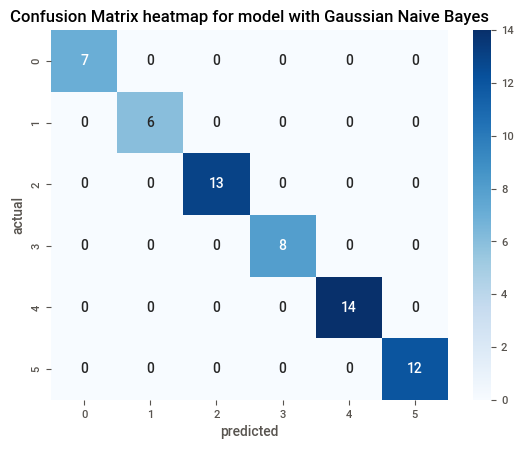

In [344]:
# Plot confusion matrix for model with Gaussian Naive Bayes
conf_mat_gnb= pd.crosstab(y_test, y_pred_gnb, rownames=['actual'], colnames=['predicted'])
sns.heatmap(conf_mat_gnb, annot= True, cmap='Blues')
plt.title('Confusion Matrix heatmap for model with Gaussian Naive Bayes')
plt.show()

# Neural Network (NN)

In [282]:
method = 'Neural Network'

# Define the model architecture using Functional API
input_shape = x_train_ss.shape[1]
num_classes = len(np.unique(y_train))

# Define input layer
inputs = tf.keras.Input(shape=(input_shape,))

# Define hidden layers
x = layers.Dense(100, activation='relu')(inputs)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)

# Define output layer with softmax activation for multiclass classification
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create the model by specifying input and output layers
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert class labels to integer-encoded labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model with progress bar using fit method
num_epochs = 50
batch_size = 64

history = model.fit(
    x_train_ss, y_train_encoded,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(x_test_ss, y_test_encoded),
    verbose=0,  # Disable Keras verbose mode to avoid redundant output
    callbacks=[TqdmCallback(verbose=1)]  # Use TqdmCallback to display progress bar
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_ss, y_test_encoded)
print(f"Accuracy : {accuracy}")

results[method] = accuracy

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 8ms/step - loss: 0.0497 - accuracy: 0.9833
Accuracy : 0.9833333492279053


# "Models Evaluation Metrics Comparison"

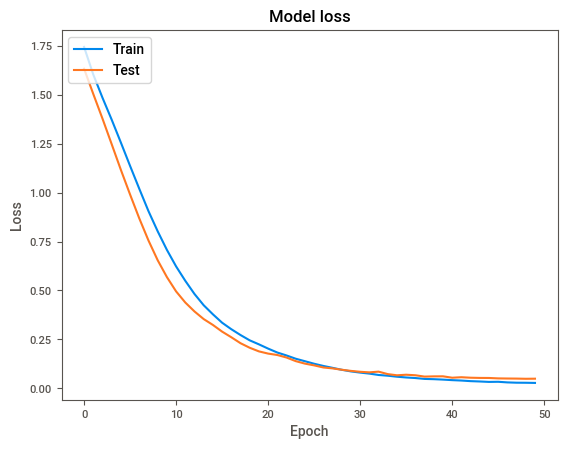

In [283]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

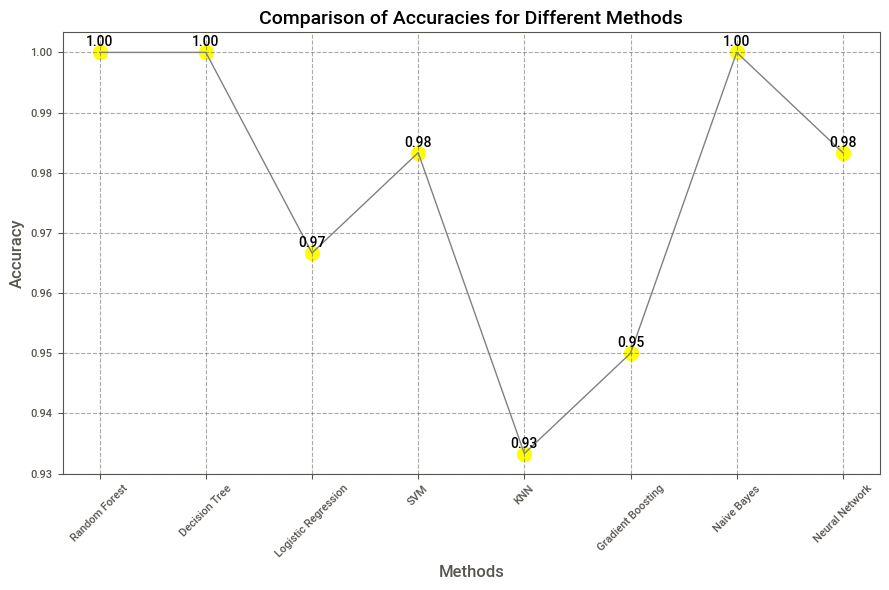

In [284]:
methods = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(9, 6))
plt.title('Comparison of Accuracies for Different Methods', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Plot the line connecting the accuracy points (gray)
plt.plot(methods, accuracies, marker='', color='gray', linestyle='-', linewidth=1)

# Plot individual accuracy points (red)
plt.scatter(methods, accuracies, color='yellow', s=100)  # 's' adjusts the size of the scatter points

# Display gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)  # 'alpha' controls the transparency of the gridlines

# Display accuracy values next to each point
for method, accuracy in zip(methods, accuracies):
    plt.text(method, accuracy + 0.001, f'{accuracy:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Random forest Classifier, Decision Tree Classifier and Naive Bayes are the best of models for star-dataset.